In [1]:
import pandas as pd
import numpy as np
bld = pd.read_csv("bank-loan.csv")

In [2]:
bld.head(5)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


## For Input data

In [6]:
age = int(input('Enter age'))
ed = int(input('Enter education'))
employ = int(input('Enter employ'))
address = int(input('Enter address'))
income = int(input('Enter income'))
debtinc = float(input('Enter debtinc'))
creddebt = float(input('Enter creddebt'))
othdebt = float(input('Enter othdebt'))

# lis =  ['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
#        'othdebt']

# 41	3	17	12	176	9.3	11.359392	5.008608	1.0
# 41	2	5	5	25	10.2	0.392700	2.157300	0.0


Enter age41
Enter education3
Enter employ17
Enter address12
Enter income176
Enter debtinc9.3
Enter creddebt11.359392
Enter othdebt5.008


In [7]:

bld.loc[len(bld)] = [str(age), str(ed), str(employ), str(address), str(income), str(debtinc), str(creddebt), str(othdebt), "NaN"]
print(bld.loc[len(bld)-1:,:])

lis = ['age', 'ed', 'employ', 'address', 'income']
for i in lis:
    bld[i] = bld[i].astype('int64')
lis = ['debtinc', 'creddebt', 'othdebt', 'default']        
for i in lis:
    bld[i] = bld[i].astype('float')
bld.dtypes


    age ed employ address income debtinc   creddebt othdebt default
850  41  3     17      12    176     9.3  11.359392   5.008     NaN


age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object

In [8]:
# temp_df = bld.copy()
# Imputed the last 150 rows of default in bld datafame.
from fancyimpute import KNN
temp_df=pd.DataFrame(KNN(k=3).fit_transform(bld), columns=bld.columns)

indexNames = temp_df[temp_df['default'] > 0.5].index
for i in range(0,len(temp_df['default'])):
    if i in indexNames:
        temp_df['default'][i] = 1.0
    else:
        temp_df['default'][i] = 0.0

        
for i in range(0,len(bld['default'])):
    bld['default'][i] = temp_df['default'][i]

Using TensorFlow backend.


Imputing row 1/851 with 0 missing, elapsed time: 0.278
Imputing row 101/851 with 0 missing, elapsed time: 0.279
Imputing row 201/851 with 0 missing, elapsed time: 0.279
Imputing row 301/851 with 0 missing, elapsed time: 0.280
Imputing row 401/851 with 0 missing, elapsed time: 0.281
Imputing row 501/851 with 0 missing, elapsed time: 0.283
Imputing row 601/851 with 0 missing, elapsed time: 0.285
Imputing row 701/851 with 1 missing, elapsed time: 0.285
Imputing row 801/851 with 1 missing, elapsed time: 0.327


c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [9]:
bld.loc[len(bld)-1:,:]
# bld.dtypes

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
850,41,3,17,12,176,9.3,11.359392,5.008,1.0


## Outlier Analysis

In [10]:
# Outlier Analysis 
import matplotlib.pyplot as plt

# df=bld.copy()
# plt.show(plt.boxplot(bld['age']))
# A-Note: Outlier Analysis can only be applied on continuous numeric variables.

## For the last default values
# from fancyimpute import KNN
# bld=pd.DataFrame(KNN(k=3).fit_transform(bld), columns=bld.columns)


colnames=['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt']

for column in colnames: 
    q75, q25 = np.percentile(bld.loc[:,column],[75,25])

#   Calculate IQR
    iqr = q75 - q25

    # Calculate inner and outer fence.
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    # print(minimum,maximum)

    # Drop
#     indexNames = bld[bld[column] < minimum].index
#     bld.drop(indexNames , inplace=True)
    
#     indexNames = bld[bld[column] > maximum].index
#     bld.drop(indexNames , inplace=True)
    
#     replace by nan.
    bld.loc[bld[column] < minimum ,:column] = np.nan
    bld.loc[bld[column] > maximum ,:column] = np.nan


bld=pd.DataFrame(KNN(k=3).fit_transform(bld), columns=bld.columns)
    
    
list=['age', 'ed', 'employ', 'address', 'income','default']
# list=['ed','default']

for i in list:
    print(i)
    bld[i] = bld[i].astype('int64')
# bld['ed'] = bld['ed'].astype('int64')
        

# B- nan occupied rows
for column in colnames: 
    Total=bld.loc[bld[column].isna()==True]
    print("NaN Occupied ",column," rows :",len(Total)) 
bld.shape    

Imputing row 1/851 with 7 missing, elapsed time: 0.270
Imputing row 101/851 with 5 missing, elapsed time: 0.276
Imputing row 201/851 with 0 missing, elapsed time: 0.283
Imputing row 301/851 with 8 missing, elapsed time: 0.291
Imputing row 401/851 with 0 missing, elapsed time: 0.301
Imputing row 501/851 with 0 missing, elapsed time: 0.309
Imputing row 601/851 with 0 missing, elapsed time: 0.319
Imputing row 701/851 with 0 missing, elapsed time: 0.326
Imputing row 801/851 with 0 missing, elapsed time: 0.330
age
ed
employ
address
income
default
NaN Occupied  age  rows : 0
NaN Occupied  ed  rows : 0
NaN Occupied  employ  rows : 0
NaN Occupied  address  rows : 0
NaN Occupied  income  rows : 0
NaN Occupied  debtinc  rows : 0
NaN Occupied  creddebt  rows : 0
NaN Occupied  othdebt  rows : 0


(851, 9)

## Feature Extraction

In [11]:
# ### Standardisation of variables.
cnames=['age', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt']
for i in cnames:
    print(i)
    bld[i] = (bld[i] - bld[i].mean())/bld[i].std()
bld.head(10)

# ### Normalisation of variables.
# for i in cnames:
#     print(i)
#     bld[i] = (bld[i] - np.min(bld[i]))/(np.max(bld[i]) - np.min(bld[i]))
bld.head(10)

age
employ
address
income
debtinc
creddebt
othdebt


,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0.295899,1,-0.398242,-0.231314,-0.166477,1.393903,0.673450,1.444298,1
1,-0.974443,1,0.477932,-0.231314,-0.367145,1.451599,0.333599,0.882364,0
2,0.860495,1,1.354106,1.140452,0.836865,-0.647304,-0.246991,-0.139051,0
3,1.566241,2,1.704576,1.483394,2.191377,-1.109774,1.820864,-0.890470,0
4,-1.397890,2,-0.923947,-1.260140,-0.517647,1.451599,0.821394,0.355878,1
5,1.001645,2,-0.398242,-0.402785,-0.668148,0.188700,-0.778538,-0.145533,0
6,-0.268698,1,-0.398242,-0.917198,-0.367145,-1.074199,0.102105,0.058338,0
7,1.283943,1,0.828402,0.626040,-0.015976,-0.985263,-1.081503,-0.657330,0
8,-1.397890,1,-0.748712,-0.574256,-0.969151,2.714498,0.329178,0.479152,1
9,0.295899,1,-1.274417,0.968982,-0.668148,1.878494,1.957348,-0.151109,0


## Correation Analysis

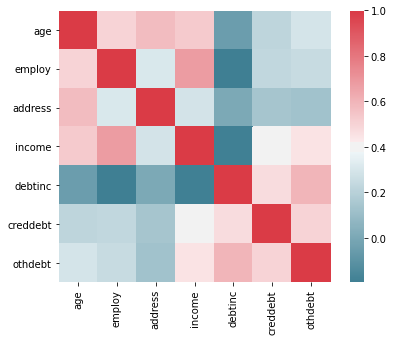

In [12]:
# ### Correlation Analysis : Only for continuous numeric variables.
#   # Correlation plot.NOTE:cp is only for continuous numeric variables.
#   # Extreme Blue:highly positively correlated.
#   # Extreme Red :highly negatively correlated.
colnames=['age', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt']
df_corr = bld.loc[:,colnames]
# print(df_corr.shape)


import matplotlib.pyplot as plt
# # Set the height and width of the plot
f, ax = plt.subplots(figsize=(7,5))

# # Generate correlation matrix.
corr = df_corr.corr()

# # Plot using seaborn library.
# # 'mask' -creates individual blocks for correlation matrix

import seaborn as sns
plt.show(sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10,as_cmap=True),
                     square=True, ax=ax))

# bld = bld.drop(['debtinc',"age","address"],axis=1)
bld = bld.drop(['debtinc'],axis=1)

# Receiver Operating Characteristic Curves

In [13]:
# roc curve and auc
#  Receiver Operating Characteristic curve
def roc_curve(x_train, x_test, y_train, y_test, model , model_name):
    from sklearn.datasets import make_classification
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    from matplotlib import pyplot


#     # Dividing data into train and test.
#     X = bld.values[:,0:len(bld.columns)-1]
#     Y = bld.values[:,len(bld.columns)-1]

#     # split into train/test sets
#     x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.37,random_state=0)

    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]

    if model_name == "LR Model":
        model = LogisticRegression(solver='lbfgs')
        model.fit(x_train, y_train)

    # predict probabilities
    lr_probs = model.predict_proba(x_test)

    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)

    # summarize scores
    print(model_name, 'No Skill: ROC AUC=%.3f' % (ns_auc))

    print(model_name, ' ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label=model_name)

    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')

    # show the legend
    pyplot.legend()

    # show the plot
    pyplot.show()
    
    return lr_auc   
     


# Precision Recall Curves

In [39]:
def pr_curve(x_train, x_test, y_train, y_test, model , model_name):
    # precision-recall curve and f1
    from sklearn.datasets import make_classification
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import f1_score
    from sklearn.metrics import auc
    from matplotlib import pyplot
    # fit a model
   
    if model_name == "LR Model":
        model = LogisticRegression(solver='lbfgs')
        model.fit(x_train, y_train)
    
    # predict probabilities
    lr_probs = model.predict_proba(x_test)
    
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    
    # predict class values
    yhat = model.predict(x_test)
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
    lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
    
    # summarize scores
    print(model_name,': f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    
    # plot the precision-recall curves
    no_skill = len(y_test[y_test==1]) / len(y_test)
    if model_name != 'LR Model':
        pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    pyplot.plot(lr_recall, lr_precision, marker='.', label=model_name)
    
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    
    # show the legend
    pyplot.legend()
    
    # show the plot
    pyplot.show()
    
    return lr_auc

# Logistic Regression Model

In [40]:
# B- nan occupied rows
# a=bld_logit.loc[bld_logit['default'].isna()==True]
# len(a)

# B-Creating logistic data and saving the target variable first.
bld_logit=pd.DataFrame(bld['default'])

# B-joining the target variable('default') with the rest of continuous variables excluding 'education'.
cnames=['employ', 'creddebt','othdebt']
# cnames=['debtinc','creddebt','othdebt']

bld_logit=bld_logit.join(bld[cnames])


# B-Joining with the categorical variable, by dividing each category(Q. Why do we need to do this)
temp = pd.get_dummies(bld['ed'], prefix='ed')
bld_logit = bld_logit.join(temp)
# bld_logit = bld_logit.drop(['ed_0'],axis=1)


bld_logit

,default,employ,creddebt,othdebt,ed_0,ed_1,ed_2,ed_3
0,1,-0.398242,0.673450,1.444298,0,1,0,0
1,0,0.477932,0.333599,0.882364,0,1,0,0
2,0,1.354106,-0.246991,-0.139051,0,1,0,0
3,0,1.704576,1.820864,-0.890470,0,0,1,0
4,1,-0.923947,0.821394,0.355878,0,0,1,0
...,...,...,...,...,...,...,...,...
846,0,1.704576,3.390113,0.093107,0,1,0,0
847,0,1.003637,-0.400442,0.537165,0,1,0,0
848,0,-1.099182,-0.750140,-0.537375,0,0,1,0
849,0,2.230281,-0.197601,1.099302,0,1,0,0


## For input data

In [41]:
input_sample=bld_logit.loc[len(bld_logit)-1:,:]
input_sample= input_sample.drop(['default'], axis=1)


# Dropping the input sample
bld_logit= bld_logit.drop(bld_logit.index[[850]])

In [42]:
# B-Slicing the df into train and test.
Sample_index = np.random.rand(len(bld_logit)) < 0.7
train = bld_logit[Sample_index]
test = bld_logit[~Sample_index]

x_train = train.drop(['default'], axis=1)
x_test = test.drop(['default'], axis=1)
y_train = train[['default']]
y_test = test[['default']]

print(x_train.shape,
x_test.shape,
y_train.shape,
y_test.shape)
print(train.shape,test.shape)

(591, 7) (259, 7) (591, 1) (259, 1)
(591, 8) (259, 8)


In [43]:
# B-Alloting column indexes to independent variables.
train_cols = train.columns[1:]
len(train_cols)
train_cols

Index(['employ', 'creddebt', 'othdebt', 'ed_0', 'ed_1', 'ed_2', 'ed_3'], dtype='object')

In [44]:
# B-Building logistic regression model.
import statsmodels.api as sm
LR_model = sm.Logit(train['default'],train[train_cols], random_state=0).fit()
LR_model.summary()

         Current function value: 0.423178
         Iterations: 35


c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  591
Model:                          Logit   Df Residuals:                      584
Method:                           MLE   Df Model:                            6
Date:                Thu, 09 Jul 2020   Pseudo R-squ.:                  0.2505
Time:                        22:52:11   Log-Likelihood:                -250.10
converged:                      False   LL-Null:                       -333.71
Covariance Type:            nonrobust   LLR p-value:                 1.751e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
employ        -1.8340      0.200     -9.171      0.000      -2.226      -1.442
creddebt       0.6089      0.138      4.423      0.000       0.339       0.879
othdebt        0.5712      0.137      4.170      0.000       0.303       0.840
ed_0         -25.6996    1.7e+05     -0.000      1.000   -3.34e+05    3.34e+05
ed_1          -1.7166      0.170    -10.074      0.000      -2.051      -1.383
ed_2          -1.6871      0.239     -7.050      0.000      -2.156      -1.218
ed_3          -2.1649      0.389     -5.569      0.000      -2.927      -1.403
==============================================================================
"""

In [45]:
# B-Predicting for test data.
test['Actual_prob']=LR_model.predict(test[train_cols])
# test.loc[0:5,'ed_5.0':'Actual_prob']

test['Actual_val']=1
# B-Selecting the index of rows with prob less than 0.5 which return an list of indexes.
idx=test.index[test['Actual_prob']<0.6]
idx
for x in idx:
    test.at[x,'Actual_val']=0

test['Actual_val'].head(20)


c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0     0
6     0
13    0
14    0
15    0
16    0
17    0
21    0
27    0
28    0
29    0
33    0
37    0
39    0
41    0
42    0
46    0
54    0
56    0
64    0
Name: Actual_val, dtype: int64

## For input data

In [46]:
test[train_cols]

,employ,creddebt,othdebt,ed_0,ed_1,ed_2,ed_3
0,-0.398242,0.673450,1.444298,0,1,0,0
6,-0.398242,0.102105,0.058338,0,1,0,0
13,-0.223007,0.739335,0.330528,0,1,0,0
14,2.580750,3.019584,1.660467,0,1,0,0
15,0.302697,-0.291223,0.545411,0,0,1,0
...,...,...,...,...,...,...,...
829,-0.047773,-0.591585,-1.210496,0,0,1,0
836,1.003637,1.932074,0.953647,0,1,0,0
839,-0.573477,-0.748158,0.318103,0,1,0,0
844,-0.748712,-1.176775,-1.149086,0,1,0,0


In [47]:
new_output = LR_model.predict(input_sample)
print(new_output)
if new_output.item() < 0.5:
    print("Default value from Logistic Regression is",0)
else :
    print("Default value from Logistic Regression is",1)
    

850    0.561165
dtype: float64
Default value from Logistic Regression is 1


Actual_val    0   1
default            
0           194   2
1            42  21
Accuracy from Logistic regression 83.01158301158301
Recall  33.333333333333336
LR Model No Skill: ROC AUC=0.500
LR Model  ROC AUC=0.843


c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


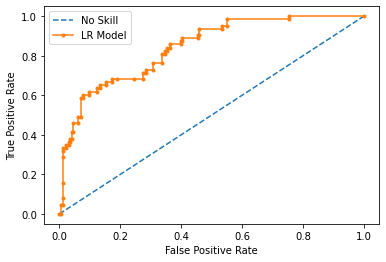

c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LR Model : f1=0.521 auc=0.638


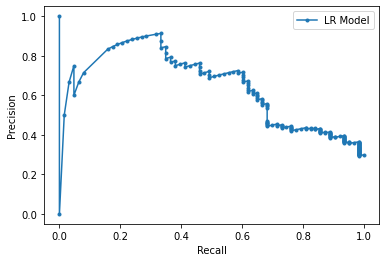

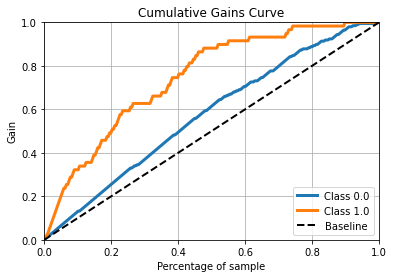

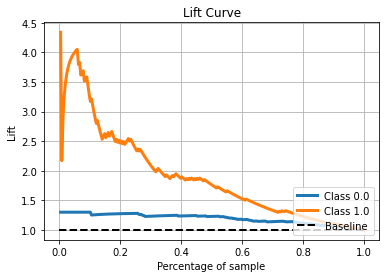

(595, 7) (256, 7) (595,) (256,)


In [48]:
# Building confusion matrix
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(test['default'],test['Actual_val'])

CM = pd.crosstab(test['default'],test['Actual_val'])
print(CM)


# test.head(20)
# Let us save TN,TP,FN,FP.
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

accuracy = ((TP + TN)*100) / (TP + TN + FN + FP)
print("Accuracy from Logistic regression", accuracy)

# Recall
recall=(TP*100)/(FN + TP)
print("Recall ", recall)
Model_name="LR Model"

############################# ROC ###################################

roc_auc = roc_curve(x_train, x_test, y_train, y_test, LR_model , Model_name)


############################ PR ##################################

pr_auc = pr_curve(x_train, x_test, y_train, y_test, LR_model , Model_name)

############################# Gain Chart #####################################


from sklearn.model_selection import train_test_split

# bld=bld.drop(bld.index([[850]]))
# Dividing data into train and test.
X = bld.values[:,0:len(bld.columns)-1]
Y = bld.values[:,len(bld.columns)-1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
test_size=0.3)

from sklearn.linear_model import LogisticRegression
import scikitplot as skplt

lr = LogisticRegression()
lr = lr.fit(x_train, y_train)
y_probas = lr.predict_proba(x_test)
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()
############################ Lift chart ###################################

import numpy as np
skplt.metrics.plot_lift_curve(y_test, y_probas)
plt.show()


print(x_train.shape,
x_test.shape,
y_train.shape,
y_test.shape)

###################### Storing Accuracy and recall  #######################

df1 = pd.DataFrame(columns=['Model_name','Accuracy','Recall','Roc_auc','Pr_auc'])
idx=len(df1)
df1.loc[idx,'Model_name'] = Model_name
df1.loc[idx,'Accuracy'] = accuracy
df1.loc[idx,'Recall'] = recall
df1.loc[idx,'Roc_auc'] = roc_auc
df1.loc[idx,'Pr_auc'] = pr_auc


### Decision Tree Model

(680, 7) (170, 7) (680,) (170,)
y_pred  0.0  1.0
y_test          
0.0     104   20
1.0      18   28
Accuracy from DT : 77.6470588235294
False Negative rate: 60.869565217391305
DT Model No Skill: ROC AUC=0.500
DT Model  ROC AUC=0.724


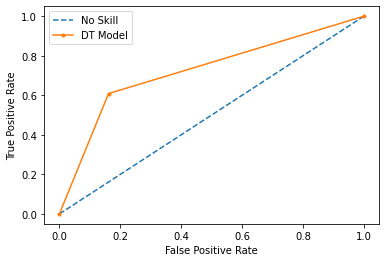

DT Model : f1=0.596 auc=0.649


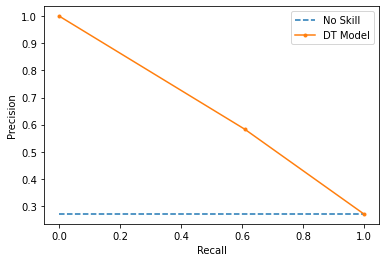

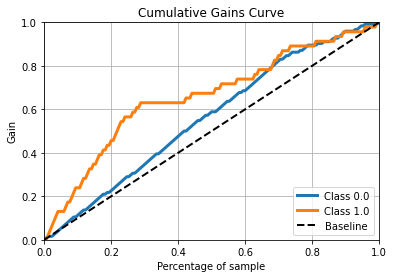

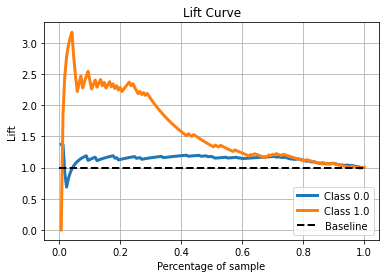

In [49]:
################ Decision Tree Model #################
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

# Dividing data into train and test.
X = bld.values[:len(bld)-1,0:len(bld.columns)-1]
Y = bld.values[:len(bld)-1,len(bld.columns)-1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# Decision tree( criterion ='entropy' means the C.50 model for classification)
DT_model = tree.DecisionTreeClassifier(criterion='entropy', random_state=0).fit(x_train, y_train)

# B-Predicting new test cases. Predicted values of default.
y_pred = DT_model.predict(x_test)
# y_pred.shape

# # B-Creating a dot file to visualize tree. #http://webgraphviz.com/
# dotfile = open("bld.dot",'w')

# # B-exporting DT.
# temp_df = bld.loc[:, bld.columns != 'default']
# df = tree.export_graphviz(DT_model, out_file=dotfile, feature_names=temp_df.columns)

# B-Building Confusion matrix.
CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, y_pred, rownames=['y_test'], colnames=['y_pred'])
print(CM)

# A-column represents predicted and row represents actual values.

# Let us save TP,TN,FP,FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

# Alternatively, Accuracy -
accuracy= ((TP + TN)*100) / (TP + TN + FN + FP)
print("Accuracy from DT :",accuracy)

# Recall.
recall=(TP*100)/(FN + TP)
print("False Negative rate:", recall)

Model_name="DT Model"
########################## ROC ############################

roc_auc=roc_curve(x_train, x_test, y_train, y_test, DT_model , Model_name)

############################ PR ##############################

pr_auc=pr_curve(x_train, x_test, y_train, y_test, DT_model , Model_name)

############################# Gain Chart #####################################

import scikitplot as skplt

y_probas = DT_model.predict_proba(x_test)
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

############################ Lift chart ###################################

import numpy as np
skplt.metrics.plot_lift_curve(y_test, y_probas)
plt.show()

###################### Storing Accuracy and recall  #######################

idx=len(df1)
df1.loc[idx,'Model_name'] = Model_name
df1.loc[idx,'Accuracy'] = accuracy
df1.loc[idx,'Recall'] = recall
df1.loc[idx,'Roc_auc'] = roc_auc
df1.loc[idx,'Pr_auc'] = pr_auc


## For new input

In [25]:
a = bld.loc[len(bld)-1:,:].drop(['default'], axis=1)
new_output=DT_model.predict(a)
print("DT Model")
print("Default value for input data is:",int(new_output[0]))

DT Model
Default value for input data is: 1




### Random Forest Classifier

RF_Predictions  0.0  1.0
y_test                  
0.0             213   19
1.0              33   41
Accuracy from Random Forest : 83.00653594771242
Recall from Random Forest: 55.4054054054054
RF Model No Skill: ROC AUC=0.500
RF Model  ROC AUC=0.874


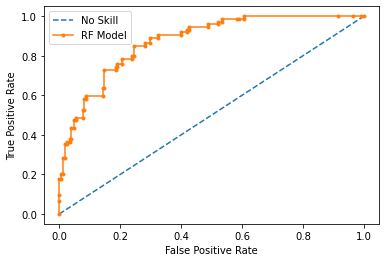

RF Model : f1=0.612 auc=0.713


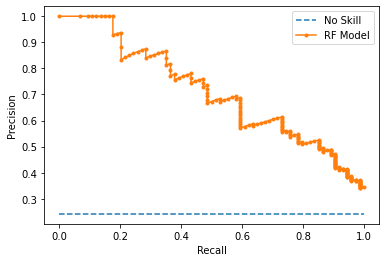

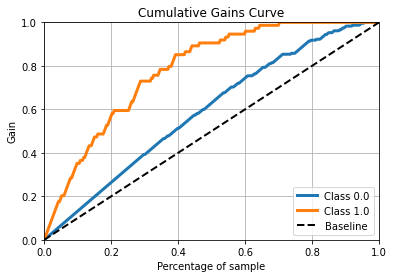

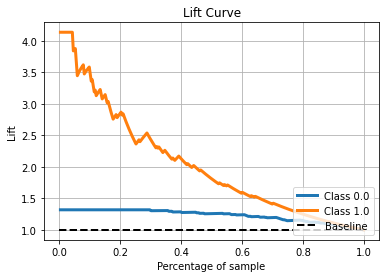

In [50]:
############ Random Forest Classifier ###########
from sklearn.model_selection import train_test_split
# Dividing data into train and test.
x = bld.values[:len(bld)-1,0:len(bld.columns)-1]
y = bld.values[:len(bld)-1,len(bld.columns)-1]

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
x_train,x_test,y_train,y_test = train_test_split(
    x, y, random_state=0, test_size=0.36)

from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=88, max_depth=9, random_state=0).fit(x_train,y_train)

RF_Predictions = RF_model.predict(x_test)



# build confusion matrix.
CM = pd.crosstab(y_test,RF_Predictions,rownames=['y_test'],colnames=['RF_Predictions'])
# Let us save TP,TN,FN,FP
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
print(CM)

# Alternatively, Accuracy -
accuracy= ((TP + TN)*100) / (TP + TN + FN + FP)
print("Accuracy from Random Forest :", accuracy)

# Recall.
recall = (TP*100)/(FN + TP)
print("Recall from Random Forest:", recall)

Model_name = "RF Model"

############################# ROC ################################

roc_auc=roc_curve(x_train, x_test, y_train, y_test, RF_model , Model_name)

############################ PR ##############################

pr_auc=pr_curve(x_train, x_test, y_train, y_test, RF_model , Model_name)

############################# Gain Chart #####################################

import scikitplot as skplt

y_probas = RF_model.predict_proba(x_test)
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

############################ Lift chart ###################################

import numpy as np
skplt.metrics.plot_lift_curve(y_test, y_probas)
plt.show()

###################### Storing Accuracy and recall  #######################

idx=len(df1)
df1.loc[idx,'Model_name'] = Model_name
df1.loc[idx,'Accuracy'] = accuracy
df1.loc[idx,'Recall'] = recall
df1.loc[idx,'Roc_auc'] = roc_auc
df1.loc[idx,'Pr_auc'] = pr_auc



## For input data

In [51]:
a = bld.loc[len(bld)-1:,:].drop(['default'], axis=1)
new_output=RF_model.predict(a)
print("RF Model")
print("Default value for input data is:",int(new_output[0]))

RF Model
Default value for input data is: 1




### KNN Model

col_0  0.0  1.0
row_0          
0.0    108   16
1.0     23   23
KNN accuracy: 77.05882352941177
Recall      : 50.0
KNN Model No Skill: ROC AUC=0.500
KNN Model  ROC AUC=0.685


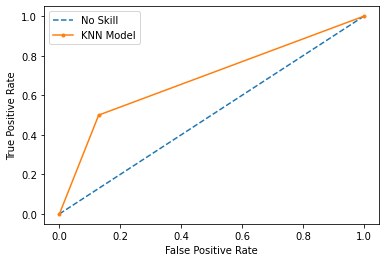

KNN Model : f1=0.541 auc=0.613


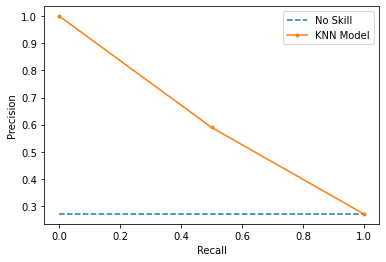

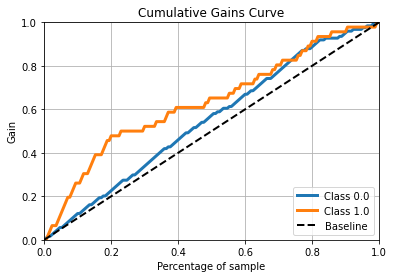

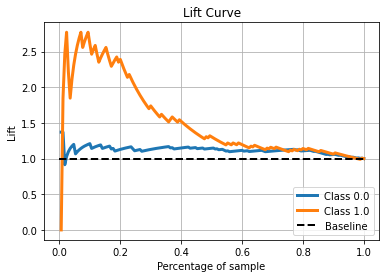

In [52]:
###################### KNN Model ###########################

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# B-Dividing data into train and test.

X = bld.values[:len(bld)-1,0:len(bld.columns)-1]
Y = bld.values[:len(bld)-1,len(bld.columns)-1]

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
KNN_model =  KNeighborsClassifier(n_neighbors=1 ).fit(x_train,y_train)
KNN_Predictions = KNN_model.predict(x_test)
KNN_Predictions.shape

# A-Predict test cases
# A-KNN_Predictions


CM = pd.crosstab(y_test, KNN_Predictions)

# Let us save  TP, TN, FP, FN.
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
print(CM)

# Check accuracy of model.
accuracy = ((TP + TN)*100) / (TP + TN + FN + FP)
print("KNN accuracy:", accuracy)

# TNR
recall = (TP*100)/(FN + TP)
print("Recall      :" ,recall)

Model_name = "KNN Model"

################################# ROC #################################

roc_auc=roc_curve(x_train, x_test, y_train, y_test, KNN_model , Model_name)

############################ PR ##############################

pr_auc=pr_curve(x_train, x_test, y_train, y_test, KNN_model , Model_name)

############################# Gain Chart #####################################

import scikitplot as skplt

y_probas = KNN_model.predict_proba(x_test)
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

############################ Lift chart ###################################

import numpy as np
skplt.metrics.plot_lift_curve(y_test, y_probas)
plt.show()

###################### Storing Accuracy and recall  #######################

idx=len(df1)
df1.loc[idx,'Model_name'] = Model_name
df1.loc[idx,'Accuracy'] = accuracy
df1.loc[idx,'Recall'] = recall
df1.loc[idx,'Roc_auc'] = roc_auc
df1.loc[idx,'Pr_auc'] = pr_auc


## For input data

In [53]:
a = bld.loc[len(bld)-1:,:].drop(['default'], axis=1)
new_output=KNN_model.predict(a)
print("KNN Model")
print("Default value for input data is:",int(new_output[0]))

KNN Model
Default value for input data is: 1




### Naive Bayes



col_0  0.0  1.0
row_0          
0.0    308  108
1.0     53   84
Naive Bayes 70.88607594936708
Recall 61.31386861313869
NB Model No Skill: ROC AUC=0.500
NB Model  ROC AUC=0.778


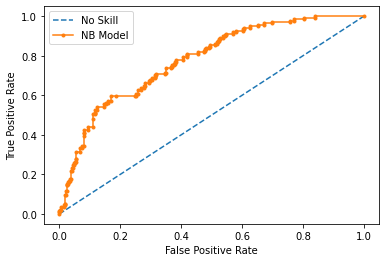

NB Model : f1=0.511 auc=0.519


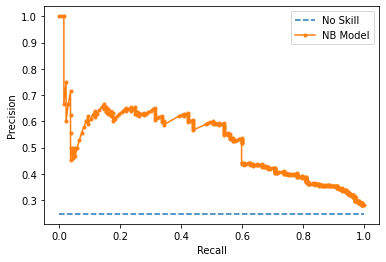

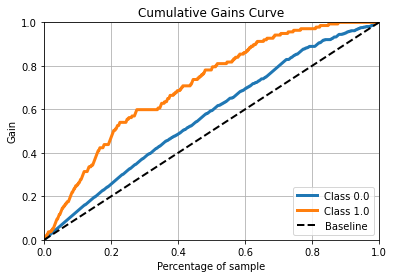

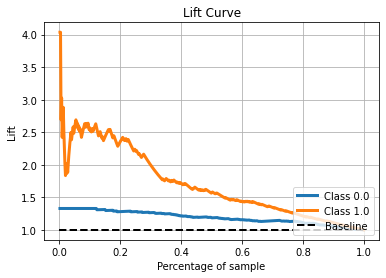

In [54]:
# GaussianNB since our target variable(responded) has only two classes; yes or no .If it has multiple classes then MultinomialNB. 
from sklearn.naive_bayes import GaussianNB

X = bld.values[:len(bld)-1,0:len(bld.columns)-1]
Y = bld.values[:len(bld)-1,len(bld.columns)-1]

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.65,random_state=0)

# Naive Bayes implementation.x_train=independent variable of training data, y_train= dependent variable of training data.
NB_model = GaussianNB(var_smoothing=1e-11).fit(x_train,y_train)

# Predict test cases
NB_Predictions = NB_model.predict(x_test)
NB_Predictions

# Build confusion matrix
CM = pd.crosstab(y_test,NB_Predictions)

# Let us save  TP, TN, FP, FN.
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
print(CM)

# Check accuracy of model.
accuracy = ((TP + TN)*100) / (TP + TN + FN + FP)
print("Naive Bayes", accuracy)
# recall
recall = (TP*100)/(FN + TP)
print("Recall",recall)

Model_name = "NB Model"


######################### ROC #############################

roc_auc=roc_curve(x_train, x_test, y_train, y_test,NB_model , Model_name)

############################ PR ##############################

pr_auc=pr_curve(x_train, x_test, y_train, y_test, NB_model , Model_name)

############################# Gain Chart #####################################

import scikitplot as skplt

y_probas = NB_model.predict_proba(x_test)
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

############################ Lift chart ###################################

import numpy as np
skplt.metrics.plot_lift_curve(y_test, y_probas)
plt.show()

###################### Storing Accuracy and recall  #######################

idx=len(df1)
df1.loc[idx,'Model_name'] = Model_name
df1.loc[idx,'Accuracy'] = accuracy
df1.loc[idx,'Recall'] = recall
df1.loc[idx,'Roc_auc'] = roc_auc
df1.loc[idx,'Pr_auc'] = pr_auc



## For input data

In [55]:
a = bld.loc[len(bld)-1:,:].drop(['default'], axis=1)
new_output=NB_model.predict(a)
print("NB Model")
print("Default value for input data is:",int(new_output[0]))

NB Model
Default value for input data is: 0



### Gradient Boosting Classifier

col_0  0.0  1.0
row_0          
0.0    116    8
1.0     22   24
Gradient Boosting Algorithm 82.0
Recall  52.17391304347826
GB Model No Skill: ROC AUC=0.500
GB Model  ROC AUC=0.823


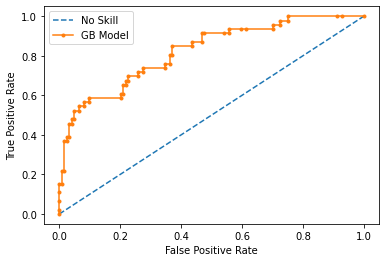

GB Model : f1=0.615 auc=0.699


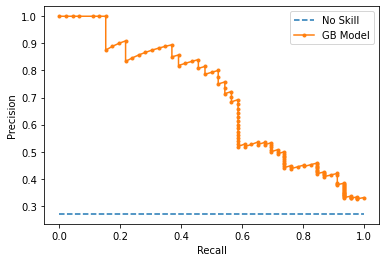

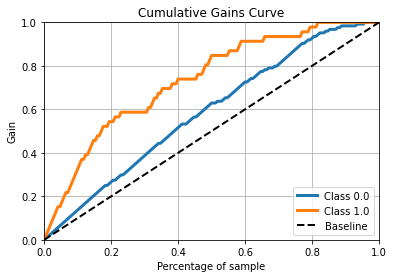

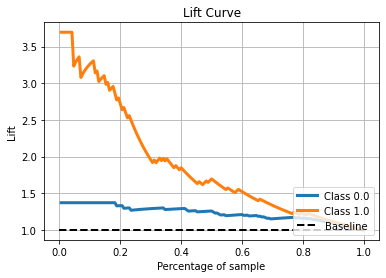

In [56]:

from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
# x, y = make_classification(random_state=0)


X = bld.values[:len(bld)-1,0:len(bld.columns)-1]
Y = bld.values[:len(bld)-1,len(bld.columns)-1]

x_train,x_test,y_train,y_test=train_test_split(X,Y, random_state=0,test_size=0.2)

GB_model = GradientBoostingClassifier(random_state=0, n_estimators=105, learning_rate=1.46, max_depth=1)
GB_model.fit(x_train, y_train)
# GradientBoostingClassifier(random_state=0)
GB_Predictions = GB_model.predict(x_test)
# array([1, 0])
GB_model.score(x_test, y_test)

# Build confusion matrix
CM = pd.crosstab(y_test,GB_Predictions)

# Let us save  TP, TN, FP, FN.
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
print(CM)

# Check accuracy of model.
accuracy = round(((TP + TN)*100) / (TP + TN + FN + FP))
print("Gradient Boosting Algorithm", accuracy)
# recall
recall = (TP*100)/(FN + TP)
print("Recall ", recall)
Model_name = "GB Model"

############################ ROC #############################

roc_auc=roc_curve(x_train, x_test, y_train, y_test, GB_model, Model_name)

############################ PR ##############################

pr_auc=pr_curve(x_train, x_test, y_train, y_test, GB_model , Model_name)

############################# Gain Chart #####################################

import scikitplot as skplt

y_probas = GB_model.predict_proba(x_test)
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

############################ Lift chart ###################################

import numpy as np
skplt.metrics.plot_lift_curve(y_test, y_probas)
plt.show()

###################### Storing Accuracy and recall  #######################

idx=len(df1)
df1.loc[idx,'Model_name'] = Model_name
df1.loc[idx,'Accuracy'] = accuracy
df1.loc[idx,'Recall'] = recall
df1.loc[idx,'Roc_auc'] = roc_auc
df1.loc[idx,'Pr_auc'] = pr_auc


## For input data

In [57]:
a = bld.loc[len(bld)-1:,:].drop(['default'], axis=1)
new_output=GB_model.predict(a)
print("GB Model")
print("Default value for input data is:",int(new_output[0]))

GB Model
Default value for input data is: 1


### XG Boosting


col_0  0.0  1.0
row_0          
0.0    220   18
1.0     36   41
Accuracy of XGB Model 83.0
Recall:  53.246753246753244
XGB Model No Skill: ROC AUC=0.500
XGB Model  ROC AUC=0.836


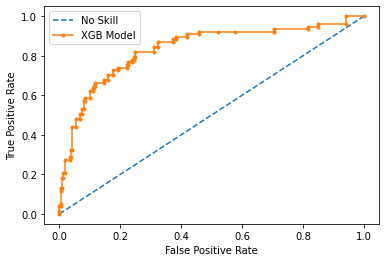

XGB Model : f1=0.603 auc=0.663


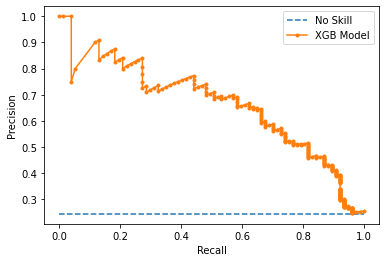

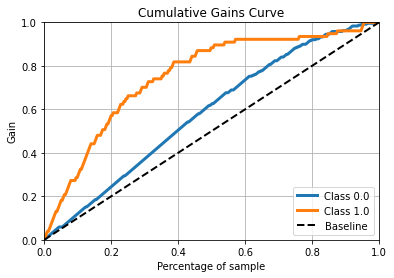

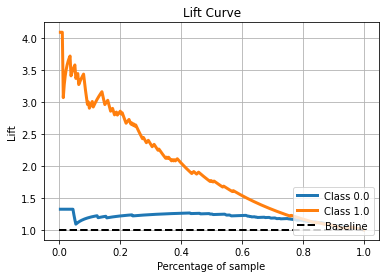

In [58]:
from xgboost import XGBClassifier

# Dividing data into train and test.
X = bld.values[:len(bld)-1,0:len(bld.columns)-1]
Y = bld.values[:len(bld)-1,len(bld.columns)-1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.37,random_state=0)

XGB_model = XGBClassifier(random_state=0, n_estimators=53, learning_rate=1.32, max_depth=6).fit(x_train,y_train)
# model = XGBClassifier( random_state=0, n_estimators=140, learning_rate=0.14, max_depth=6)



# predict the target on the train dataset
XGB_Predictions = XGB_model.predict(x_test)

# a=XGB_model.score(x_test, y_test)
# a
# Build confusion matrix
CM = pd.crosstab(y_test, XGB_Predictions)

# Let us save  TP, TN, FP, FN.
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
print(CM)

# Check accuracy of model.
accuracy=round(((TP + TN)*100) / (TP + TN + FN + FP))
print("Accuracy of XGB Model",accuracy)
#Recall
recall=(TP*100)/(FN + TP)
print("Recall: ",recall)

Model_name="XGB Model"

############################ ROC ##############################

roc_auc=roc_curve(x_train, x_test, y_train, y_test, XGB_model , Model_name)

############################ PR ###############################

pr_auc=pr_curve(x_train, x_test, y_train, y_test, XGB_model , Model_name)

############################# Gain Chart #####################################

import scikitplot as skplt

y_probas = XGB_model.predict_proba(x_test)
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

############################ Lift chart ###################################

import numpy as np
skplt.metrics.plot_lift_curve(y_test, y_probas)
plt.show()


#########################################

idx=len(df1)
df1.loc[idx,'Accuracy'] = accuracy
df1.loc[idx,'Recall'] = recall
df1.loc[idx,'Model_name'] = Model_name
df1.loc[idx,'Roc_auc'] = roc_auc
df1.loc[idx,'Pr_auc'] = pr_auc


## For input data

In [59]:
a = bld.loc[len(bld)-1:,:].drop(['default'], axis=1)
new_output=XGB_model.predict(a.values)
print("XGB Model")
print("Default value for input data is:",int(new_output[0]))

XGB Model
Default value for input data is: 1


## Support Vector Machine Model

SVC(C=2.79, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)
col_0    0   1
row_0         
0      125   7
1       14  25
Accuracy of SVM Model 88.0
Recall:  64.1025641025641
SVM Model No Skill: ROC AUC=0.500
SVM Model  ROC AUC=0.884


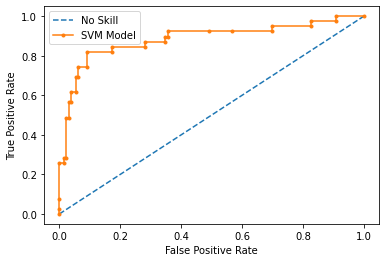

SVM Model : f1=0.706 auc=0.779


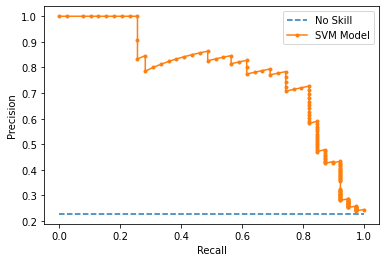

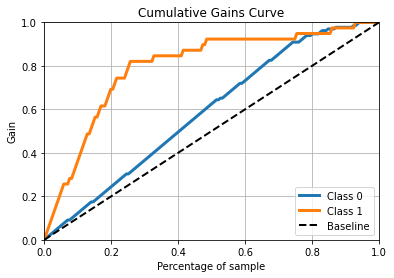

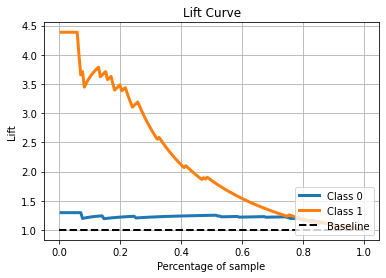

In [60]:
 #Data Pre-processing Step  
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
  
    
#Extracting Independent and dependent Variable  
X= bld.iloc[:, 0:len(bld.columns)-1].values 
Y= bld.iloc[:, len(bld.columns)-1].values  
  
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.20, random_state=0)  

#feature Scaling
# from sklearn.preprocessing import StandardScaler    
# st_x= StandardScaler()    
# x_train= st_x.fit_transform(x_train)    
# x_test= st_x.transform(x_test)

from sklearn.svm import SVC # "Support vector classifier" rbf 
# SVM_model = SVC(kernel='rbf', random_state=0, C=2.0, gamma=1.0)  
# SVM_model = SVC(kernel='rbf', random_state=0, C=3.0, gamma=0.5)
SVM_model = SVC(kernel='rbf', random_state=0, C=2.79, gamma=0.5 )

SVM_model.fit(x_train, y_train) 
print(SVM_model)
#Predicting the test set result  
SVM_Predictions= SVM_model.predict(x_test)  

# Build confusion matrix
CM = pd.crosstab(y_test, SVM_Predictions)

# Let us save  TP, TN, FP, FN.
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
print(CM)

# Check accuracy of model.
accuracy=round(((TP + TN)*100) / (TP + TN + FN + FP))
print("Accuracy of SVM Model",accuracy)
#Recall
recall=(TP*100)/(FN + TP)
print("Recall: ",recall)

Model_name="SVM Model"


############################ ROC ##############################

roc_auc=roc_curve(x_train, x_test, y_train, y_test, XGB_model , Model_name)

############################ PR ###############################

pr_auc=pr_curve(x_train, x_test, y_train, y_test, XGB_model , Model_name)

############################# Gain Chart #####################################

import scikitplot as skplt

y_probas = XGB_model.predict_proba(x_test)
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

############################ Lift chart ###################################

import numpy as np
skplt.metrics.plot_lift_curve(y_test, y_probas)
plt.show()


#########################################

idx=len(df1)
df1.loc[idx,'Accuracy'] = accuracy
df1.loc[idx,'Recall'] = recall
df1.loc[idx,'Model_name'] = Model_name
df1.loc[idx,'Roc_auc'] = roc_auc
df1.loc[idx,'Pr_auc'] = pr_auc


## For input data

In [61]:
a = bld.loc[len(bld)-1:,:].drop(['default'], axis=1)
new_output=SVM_model.predict(a.values)
print("SVM Model")
print("Default value for input data is:", (new_output[0]))

SVM Model
Default value for input data is: 1


## Dataframe for Accuracy and Recall of Models 

In [62]:
df1

,Model_name,Accuracy,Recall,Roc_auc,Pr_auc
0,LR Model,83.0116,33.3333,0.84289,0.638351
1,DT Model,77.6471,60.8696,0.723703,0.648956
2,RF Model,83.0065,55.4054,0.874476,0.712544
3,KNN Model,77.0588,50,0.685484,0.612519
4,NB Model,70.8861,61.3139,0.778214,0.518924
5,GB Model,82,52.1739,0.822756,0.699173
6,XGB Model,83,53.2468,0.835698,0.662854
7,SVM Model,88,64.1026,0.884421,0.779454
